# CCT - ML CA2 - eBay Shill Bidding Dataset
<b>by Victor Ferreira Silva</b><p>Student #2021324</p><p>January 2023</p>

## Table Of Contents
* [Introduction](#Introduction)
* [Data Preparation](#DataPreparation)
    * [Data Characterisation](#DataCharact)    
    * [Exploratory Data Analysis](#ExploratoryDataAnalysis)
    * [Data Cleaning](#DataCleaning)
    * [Feature Engineering](#FeatureEngineering)
    * [Handling Imbalanced Data](#DataBalancing)
    * [Data Scaling](#DataScaling)
* [Dimensionality Reduction](#Dimensionality)
    * [Principal Component Analysis (PCA)](#Pca)
* [Machine Learning](#MachineLearning)
    * [LinearSVC](#LinearSVC)
    * [Neural Networks](#Ann)
    * [k-Nearest Neighbours](#Knn)
* [Conclusion](#Conclusion)
    * [Classification Report](#ClfReport)
    * [Confusion Matrix](#ConfMatrix)
    * [Cross Validation](#CrossValidation)
* [References](#References)

[SBD Dataset Web Page](https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset)

## <a id="Introduction"></a>Introduction ##
The ability to predict normal and abnormal bidding behaviour of eBay users can help companies identify scams and other undesirable users on the platform. The Shill Bidding Dataset (SBD) consists of eBay auctions that have various features, including auction duration, bidder tendency and class.

The aim of this project is to apply both supervised and unsupervised machine learning techniques to the SBD. Prior to modeling, the dataset was properly prepared and characterized, and some patterns and trends were observed in the exploratory data analysis section. It was discovered that the data was imbalanced, as is often the case. As a result, the data was scaled using `RandomUnderSampling` before being split into a training dataset and a test dataset. Additionally, dimensionality reduction was performed a priori on the training dataset using Principal Component Analysis (PCA).

Lastly, three machine learning algorithms were selected for this study - LinearSVC, Neural Networks, and k-Nearest Neighbors - and the performance and accuracy of the each of these methods were compared. The methods that performed best on this dataset were identified at the final section of the report.

## Data Preparation<a id="DataPreparation"></a>
Data preparation involves various steps, including data characterisation, exploratory data analysis, data cleaning, feature engineering, and data scaling, in order to prepare data for analysis or modeling. All of these steps are crucial for ensuring that the data is suitable for the intended analysis or modeling tasks.

Before continuing, it is necessary to import certain resources, as follows:

In [27]:
# supressing warnings
import warnings
warnings.filterwarnings('ignore')

# importing libraries for data manipulation and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries and classes for data preparation
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import sklearn.metrics as metrics

# importing classes and functions for PCA, hyperparametrisation and cross-validation
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Data Characterisation<a id="DataCharact"></a> 
Data characterisation involves summarising the various features and characteristics present in a dataset through preprocessing. This process typically involves using statistical measures to introduce the data to the viewer, as well as visualising it using graphs such as bar charts and scatter plots.

For this analysis, the original Shill Bidding Dataset (SBD) was downloaded from the [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset) and incorporated into this project to ensure the validity of the results when assessed.

In [44]:
# loading the original dataset with pandas
df = pd.read_csv('Shill Bidding Dataset.csv')

# presenting the first five lines
df.head(5)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


The dataset was loaded into the program from a CSV file and stored in a dataframe and its first five rows were presented using the `head` function. It was decided not parsing `Record_ID` as index, since this column will be used for further calculations in this section. Also, the `info()` function is used to get information about the dataframe, including the data types of each column and the number of non-null values, which can be useful for identifying any missing or incorrect data.

In [45]:
# getting information about df, data types and amount of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


Furthermore, it has been determined that there are no missing values within the dataset, as evidenced by the fact that the Non-null count for all 11 feature columns is equal to the total number of entries for the dataset, which is 6321. This conclusion can be further corroborated through the use of the `isnull()` and `sum()` methods, which count the number of null values in each column and sum them to obtain the total number of null values within the DataFrame.

In [47]:
# counting the number of missing values in a DataFrame and printing out the total count.
print('Total of Missing Values = {}'.format(df.isnull().sum().sum()))

Total of Missing Values = 0


In [48]:
# generating descriptive stats, then transposing results
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record_ID,6321.0,7535.829457,4364.759137,1.000000,3778.000000,7591.000000,11277.000000,15144.000000
Auction_ID,6321.0,1241.388230,735.770789,5.000000,589.000000,1246.000000,1867.000000,2538.000000
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.000000
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.000000
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.000000
Last_Bidding,6321.0,0.463119,0.380097,0.000000,0.047928,0.440937,0.860363,0.999900
Auction_Bids,6321.0,0.231606,0.255252,0.000000,0.000000,0.142857,0.454545,0.788235
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000,0.000000,0.000000,0.993593,0.999935
Early_Bidding,6321.0,0.430683,0.380785,0.000000,0.026620,0.360104,0.826761,0.999900
Winning_Ratio,6321.0,0.367731,0.436573,0.000000,0.000000,0.000000,0.851852,1.000000


Upon initial examination, the SBD dataset contains 6321 observations with 12 columns. The first three columns represent the record ID, auction ID, and bidder. According to the Pandas `info()` method, all columns except the bidder ID are numeric. 

Also, the `describe()` method provides some general descriptive statistics for the data. Apparently, the data has undergone some pre-processing, as the range of auction duration is from 0 to 10 and the range of all other numerical features is from 0 to 1. On top of that, duplicated values were not found in this dataset, as it can be seen on the following line.

In [49]:
# checking if there are any duplicated rows
df.duplicated().any()

False

### Exploratory Data Analysis<a id="ExploratoryDataAnalysis"></a> 
According to the pie chart below, only 10.7% (674 observations) of the biddings on SBD are considered "abnormal". As a consequence, the imbalanced nature of the data in this case should be taken into consideration when analysing or modelling the data. A heavily imbalanced dataset such as this can potentially influence the results of the analysis, as the majority of the observations belong to the "normal" class. To mitigate this issue, it may be necessary to adjust the balance of the data through oversampling of the minority class or undersampling of the majority class in order to obtain a more balanced dataset. This can help prevent bias towards the majority class in the model or analysis.

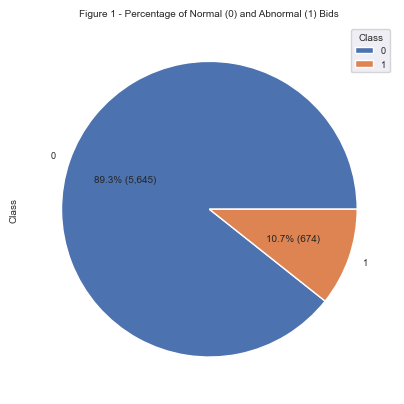

In [98]:
# function to customise label for pie chart
def custom_autopct(pct):
    return f"{pct:.1f}% ({int(pct * sum(df['Class'].value_counts()) / 100):,})"

# generating pie chart for 'Class' column
df['Class'].value_counts().plot(kind='pie', autopct=custom_autopct)
plt.legend(title='Class')
plt.title('Figure 1 - Percentage of Normal (0) and Abnormal (1) Bids')
plt.show()

The heatmap below shows the correlation matrix for all numerical features in a single graph. A very strong positive correlation between early and last bidding features is notorious. Another noticeable relationships are the strong correlation between the winning ratio and bidding ratio and the very strong positive one between sucessive outbidding and class.

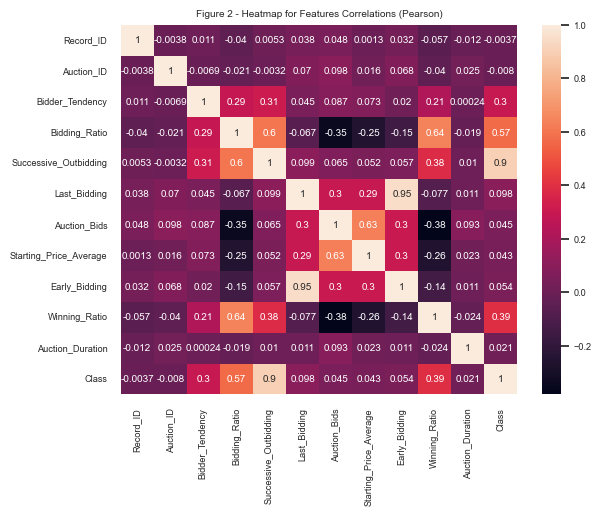

In [99]:
# Computing the correlations between features
corr = df.corr()

# plotting correlations heatmap
sns.set(font_scale=0.6)
sns.heatmap(corr, annot=True)
plt.title('Figure 2 - Heatmap for Features Correlations (Pearson)')
plt.show()

The following boxplot illustrates the distribution of bids among the 1054 distinct bidders identified using the `Bidder_ID` feature, which serves as a unique identifier for each bidder, and `Record_ID` to count the amount of distinct bids for each bidder. As indicated, three quarters of bidders made 7 bids or fewer, with some outliers making up to 112 bids. It is worth noting that the most frequently occurring number of bids per bidder was 1.

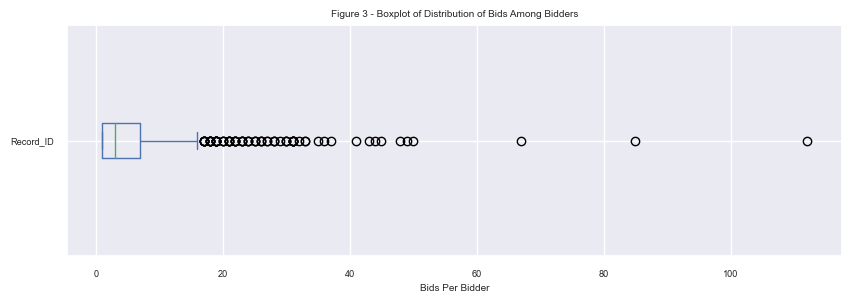

In [100]:
# calculating amount of bids/records for each Bidder_ID
bids_per_bidder = df.pivot_table(index='Bidder_ID', values='Record_ID', aggfunc='count')

# calculating mode bids per bidder
# bids_per_bidder.mode()

# plotting boxplot for distribution of bids/records for each Bidder_ID
bids_per_bidder.plot(kind='box', figsize=(10, 3), vert=False)
plt.title('Figure 3 - Boxplot of Distribution of Bids Among Bidders')
plt.xlabel('Bids Per Bidder')
plt.show()

Similarly, the following histogram shows the distribution of bids among the 807 distinct auctions identified using the `Auction_ID` feature, which serves as a unique identifier for each auction, and `Record_ID` to count the amount of distinct bids for each auction. As shown, half of the auctions received 7 bids or fewer, with a few outliers receiving 26 bids. It is worth mentioning that the most frequently occurring value, or the mode, was 5. 

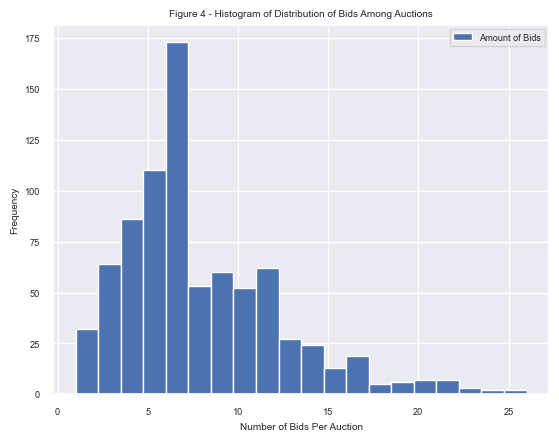

In [101]:
# calculating amount of bids/records for each Auction_ID
bids_per_auction = df.pivot_table(index='Auction_ID', values='Record_ID', aggfunc='count')

# calculating mode bids per auction
# bids_per_auction.mode()

# plotting boxplot for distribution of bids/records by auction
bids_per_auction.plot(kind='hist', bins=20)
plt.title('Figure 4 - Histogram of Distribution of Bids Among Auctions')
plt.xlabel('Number of Bids Per Auction')
plt.ylabel('Frequency')
L=plt.legend()
L.get_texts()[0].set_text('Amount of Bids')
plt.show()

The following boxplots illustrate the distribution of several numerical features with values ranging from 0 to 1. These 8 features are illustrated in grouped boxplots as it is an effective way to visualise multiple distributions in a single graph, particularly when the y-axis range is consistent across all features. This plot provides valuable information, including the distribution of observations, quartile range including the median, and minimum and maximum values, which represent the range.

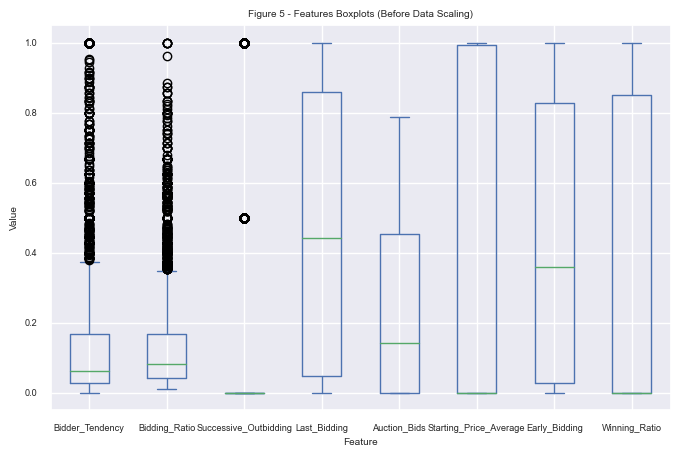

In [106]:
# listing columns with range 0-1
columns = ['Bidder_Tendency','Bidding_Ratio','Successive_Outbidding','Last_Bidding','Auction_Bids',
 'Starting_Price_Average','Early_Bidding','Winning_Ratio']

# plotting grouped boxplots
df[columns].plot(kind='box', figsize=(8, 5))
plt.title('Figure 5 - Features Boxplots (Before Data Scaling)')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

Finally, we have a simple histogram for Auction Duration, which was analysed separately as it has a distinct range from other features, that is, from 1 to 10. The histogram only reveals the presence of 5 distinct values which may indicate the availability of some predetermined auction duration options offered by the platform to sellers.

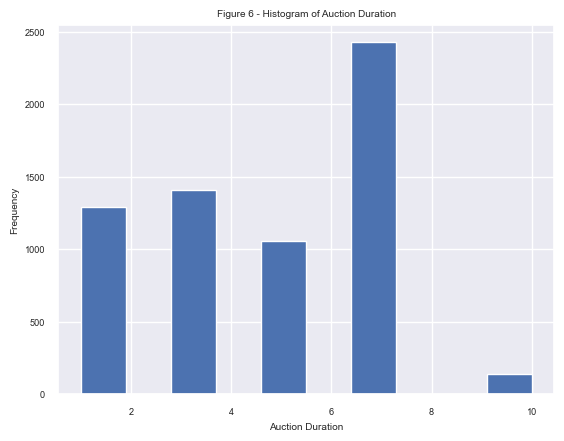

In [103]:
# building an histogram to investigate how auction durations are distributed
df['Auction_Duration'].plot(kind='hist', bins=10)

# plotting histogram
plt.title('Figure 6 - Histogram of Auction Duration')
plt.xlabel('Auction Duration')
plt.ylabel('Frequency')
plt.show()

### Data Cleaning<a id="DataCleaning"></a> 
As the series do not present any missing or duplicated data, it was decided to continue the interactions with the original dataset.

### Feature Engineering<a id="FeatureEngineering"></a> 
Feature engineering is an essential part of preparing data for machine learning modeling. It involves using various techniques, such as mathematical transformations, to modify the feature space in order to improve model performance. A Machine Learning expert is responsible for determining which features are relevant and should be included in the analysis.

One common first step in Feature Engineering is to remove unnecessary columns. In this case, the first three columns contain IDs that do not contribute to the analysis and can be removed. This process often involves trial and error, and requires careful judgement to ensure that the most useful features are retained.

In [67]:
# removing redundant ID columns from dataframe
df_feat = df.drop(columns=['Record_ID', 'Auction_ID', 'Bidder_ID'])
df_feat.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


### Handling Imbalanced Data<a id="DataBalancing"></a> 

When splitting a dataset into training and testing sets, with the training set comprising 80% of the data and the testing set comprising the remaining 20%, it was observed that the training set is considerably imbalanced, with 89% of the labels defined on column `Class` being "Normal" (0) and only 11% being "Abnormal" (1). 

In [70]:
# defining features (X) and label (y)
X = df_feat.drop('Class', axis=1)
y = df_feat['Class']

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# calculating the percentage of each label in the dataset
y_train.value_counts(normalize=True)

0    0.892603
1    0.107397
Name: Class, dtype: float64

Balancing training data is important in machine learning because it can help prevent the model from being biased towards the more prevalent class. Also, using a Dummy Classifier, which always predicts the most prevalent class, can be a useful baseline for comparison when evaluating the performance of a machine learning model on imbalanced data.

In [69]:
# establishing a baseline with a DummyClassifier
dummyc = DummyClassifier()
dummyc.fit(X_train, y_train)

# retrieving score for DummyClassifier
score = dummyc.score(X_train, y_train)
y_predicted = dummyc.predict(X_test)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predicted))

Score:  0.8926028481012658
Accuracy:  0.8956521739130435


The need for a strategy to address imbalanced data is clear, and the decision was made to utilize random undersampling in this analysis. While this method does involve discarding of a large amount of data, it was considered to be a valid option for this study, due to the potential for overfitting when using random oversampling, which involves the duplication of minority class examples.

In [72]:
# balancing data by under sampling technique
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# splitting the balanced datasets for training and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# calculating the percentage of each label in the dataset after undersampling
y_train_rus.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

### Data Scaling <a id="DataScaling"></a> 
Different orders of magnitude in the data can affect the results of machine learning algorithms. Standardisation and normalisation are commonly used scaling methods, but it is important to choose a method that preserves the impact of the outliers on the output of the machine learning algorithm. For this analysis, even though the auction duration variable does not disproportionately impact the model compared to the other features, a `StandardScaler` was adopted. 

In [77]:
# instantiating std scaler
scaler = StandardScaler()

# normalising training balanced features
X_train_rus_scaled = scaler.fit_transform(X_train_rus.astype(np.float32))

# normalising test features
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

It is evident from the comparison of the boxplots in Figure 5 and Figure 7 that the standardisation of the data has resulted in the features having a more comparable scale. In addition, the presence of outliers in the `Bidder_Tendency` and `Bidding_Ratio` features is still apparent in Figure 7, although this is no longer the case for the `Successive_Outbidding` feature.

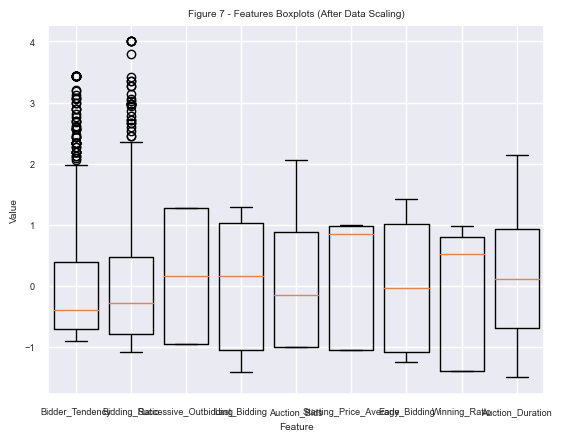

In [109]:
# listing features names
features = [X_train_rus_scaled[:, i] for i in range(9)]

# plotting grouped boxplot again after undersampling and normalisation
plt.boxplot(features, widths=0.8)
plt.title('Figure 7 - Features Boxplots (After Data Scaling)')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(range(1, 10), X_train_rus.columns)
plt.show() 

## Dimensionality Reduction<a id="Dimensionality"></a>

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset. It is often used as a preprocessing step before applying machine learning algorithms, as it can help to reduce the computational complexity of the model, improve its interpretability, and reduce the risk of overfitting.


### Principal Component Analysis (PCA)<a id="Pca"></a>

Principal component analysis (PCA), an unsupervised learning method, is a frequently utilized technique for dimensionality reduction. It involves a linear transformation that identifies the directions in the data with the greatest variance, known as the "principal components." The principal components are ranked according to the variance they capture, with the first component capturing the most variance and subsequent components capturing progressively less.

It is recommended that the model be trained on the training data without utilizing any information from the test data. If PCA is applied to the entirety of the data, including the test data, prior to training the model, then it can be said that information from the test data has been utilized. Therefore, the behavior of the model cannot accurately be assessed using the test data, as it is no longer unseen.

In this project, PCA applies to the normalised training dataset after setting the `n_components` hyperparameter to 2, indicating that the first two principal components should be retained. As a result, the percentage of variance captured by the first and second principal components is respectively 29.6% and 28.1%, which together capture a total of 57.7% of the variance in the data. The first and second principal components are then used to create a scatter plot of the reduced data, which is coloured by the `Class` column of the original dataset. This visualization allows for the examination of the distribution of the different classes within the two-dimensional space defined by the principal components.

In [110]:
# initialising PCA with 2 components
pca = PCA(n_components=2)

# fitting PCA with features after undersampling and normalisation
pca.fit(X_train_rus_scaled)

# reducing dimensionality in undersampled, normalised training dataset
X_train_pca = pca.transform(X_train_rus_scaled)

print("Original shape: {}".format(str(X_train_rus.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape)))

Original shape: (1076, 9)
Reduced shape: (1076, 2)


In [111]:
# retrieving variance captured by the components
variance_captured = pca.explained_variance_ratio_
print(variance_captured)

[0.29620245 0.28082344]


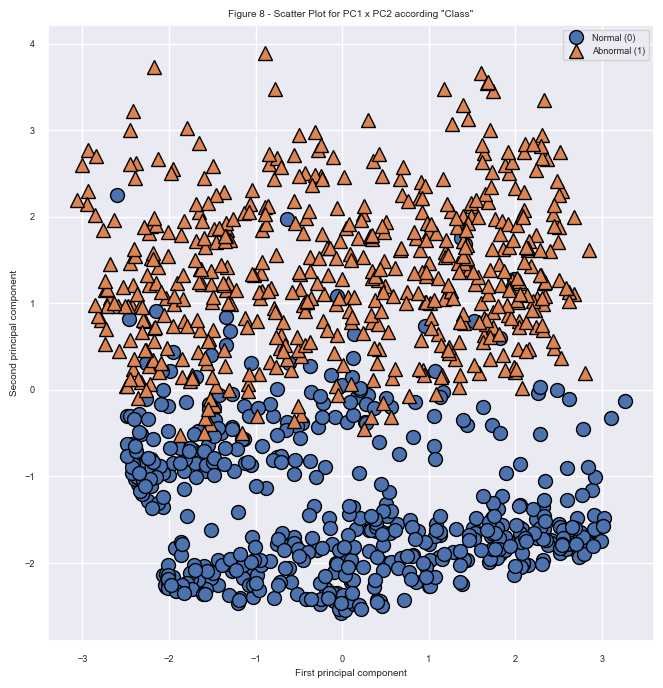

In [122]:
import mglearn

# plotting first vs. second principal component, colored by class
plt.figure(figsize = (8, 8))

# selecting PC1, PC2, then label
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train_rus)

plt.legend(['Normal (0)','Abnormal (1)'], loc="best")
plt.gca().set_aspect("equal")
plt.title('Figure 8 - Scatter Plot for PC1 x PC2 according "Class"')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

Text(0, 0.5, 'Principal components')

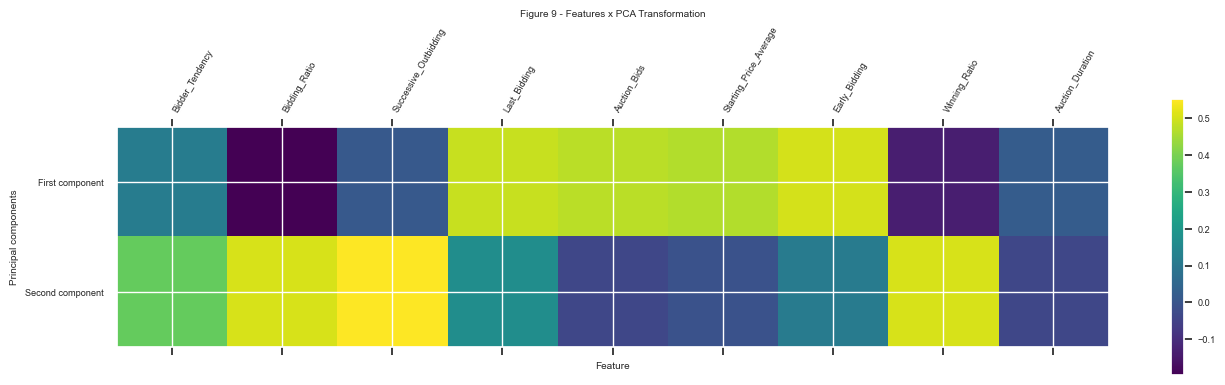

In [126]:
# creating a matrix representing the directions of maximum variance in the data
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(list(X_train_rus.columns))), list(X_train_rus.columns), rotation=60, ha='left')
plt.title('Figure 9 - Features x PCA Transformation')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Machine Learning<a id="MachineLearning"></a>

After adopting PCA to reduce the dimensionality of data, three supervised learning techniques were employed to classify labeled bids from SBD as either normal or abnormal: LinearSVC, Artificial Neural Networks, and k-Nearest Neighbours. The parametrisation for each algorithm was tuned through hyperparametrisation and the use of GridSearchCV.

LinearSVC is a type of support vector machine that is employed for classification tasks by identifying a hyperplane in order to maximise the distance between classified samples. As PCA indicated that the data appears to be linearly separable, LinearSVC has been selected as one of the options for classification.

The use of Neural Networks (ANN) in the classification of SBD is considered reasonable, despite the presence of linearity in the resulting data from PCA. This decision was made in order to compare the performance of models capable of modeling non-linear relationships, such as ANN, with models such as LinearSVC, which are known to be effective in dealing with data that is more linearly separable.

Finally, the use of k-Nearest Neighbours (kNN) for the classification of labeled records from the SBD was also considered in this study, as it has been demonstrated to be effective in solving classification problems. Additionally, the reduced dimensionality resulting from the use of PCA serves to improve the efficiency and effectiveness of the kNN model, as distance-based classification can be computationally expensive when dealing with a large number of dimensions.

Before proceeding, it is necessary to apply PCA to the test data as well, as can be seen below, as the training data was previously subjected to this dimensionality reduction technique. If PCA is applied to the entire dataset, including the test data, before training the model, then information from the test data will be used. This can compromise the ability to accurately evaluate the model's performance on the test set, as it is no longer an unseen dataset.

In [128]:
# initialising PCA for test data, with 2 components
pca_test = PCA(n_components=2)

# fitting PCA with test features after normalisation
pca_test.fit(X_test_scaled)

# reducing dimensionality in normalised test dataset
X_test_pca = pca.transform(X_test_scaled)

print("Original shape: {}".format(str(X_test_scaled.shape)))
print("Reduced shape: {}".format(str(X_test_pca.shape)))

Original shape: (270, 9)
Reduced shape: (270, 2)


Using a Dummy Classifier on normalised data serves as a baseline for comparison of the performance of the other models. By providing a reference point for evaluation, the effectiveness of the following models can be accurately assessed as they are also run on scaled data. This helps to ensure that any improvements in accuracy or performance of the other models are due to their specific algorithms rather than simply the effect of the data being normalised.

In [129]:
# DummyClassifier x Normalized data
dummyc = DummyClassifier()
dummyc.fit(X_train_pca, y_train_rus)

# confirming if score for Dummy classifier results from a balanced dataset
score = dummyc.score(X_train_pca, y_train_rus)
y_predicted = dummyc.predict(X_test_pca)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predicted))

Score:  0.5
Accuracy:  0.4925925925925926


### Linear SVC<a id="LinearSVC"></a>
In the following code, a LinearSVC classifier is imported and instantiated. A grid search is performed using the GridSearchCV object, which is passed the LinearSVC classifier and a dictionary containing various parameters as inputs. The grid search is then fit to the training data and used to find the optimal combination of parameters for the classification model. The best score and best estimator are printed, and the optimal values for the specified parameters are extracted and used to instantiate a new LinearSVC classifier. This classifier is then fit to the training data and used to generate predictions on the test data. 

In [130]:
from sklearn.svm import LinearSVC

# Dict containing different parameters for LinearSVC 
param_grid = {
    'penalty': ['l1','l2'],
    'loss':['hinge', 'squared_hinge'],
    'dual': [False, True],
    'multi_class': ['ovr', 'crammer_singer']
}

# LinearSVC classifier
lin_clf = LinearSVC()

# GridSearchCV object is instantiated with these parameters and fit to training data
# using 10-fold cross validation and suppressing verbosity
grid_search_lsvc = GridSearchCV(estimator=lin_clf, param_grid=param_grid, cv=10, verbose=1)

# GridSearchCV object will be used to find the optimal combination of these parameters for the classification model
grid_search_lsvc.fit(X_train_pca, y_train_rus)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'dual': [False, True],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [132]:
# best accuracy achieved in the grid search and the best estimator
print("best accuracy", grid_search_lsvc.best_score_)
print(grid_search_lsvc.best_estimator_)

best accuracy 0.9488750432675666
LinearSVC(dual=False, loss='hinge', multi_class='crammer_singer', penalty='l1')


In [133]:
# retrieving optimal values for the parameters dual, loss, multi_class, and penalty from grid search
optimal_dual = grid_search_lsvc.best_params_['dual']
optimal_loss = grid_search_lsvc.best_params_['loss']
optimal_multi_class = grid_search_lsvc.best_params_['multi_class']
optimal_penalty = grid_search_lsvc.best_params_['penalty']

# instantiating a new LinearSVC classifier with optimal values
lin_clf = LinearSVC(dual=optimal_dual, loss=optimal_loss, multi_class=optimal_multi_class, penalty=optimal_penalty)
lin_clf.fit(X_train_pca, y_train_rus)

# calculating score and accuracy
score = lin_clf.score(X_train_pca, y_train_rus)
y_predicted_lin_clf = lin_clf.predict(X_test_pca)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predicted_lin_clf))

Score:  0.9507434944237918
Accuracy:  0.9296296296296296


### Neural Networks<a id="Ann"></a>

The following script employs TensorFlow and Keras to implement an artificial neural network classifier. The `build_clf` function defines the classifier, taking as an input the number of units in the hidden layers. A grid search is then conducted to identify the optimal hyperparameters, comprising batch size, number of epochs, and the number of units in each hidden layer. The optimised model is subsequently trained using the determined hyperparameters, and its score and accuracy are printed.

In [429]:
# importing necessary modules, KerasClassifier wrapper, Sequential and Dense layers from Keras
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense


# defining function to create a Keras classifier
def build_clf(unit):
    # initialize Sequential model and adding layers to it
    ann_clf = tf.keras.models.Sequential()
    ann_clf.add(tf.keras.layers.Dense(units=unit, activation='relu'))
    ann_clf.add(tf.keras.layers.Dense(units=unit, activation='relu'))
    ann_clf.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    # compiling model with chosen optimizer, loss function, and evaluation metrics
    ann_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return ann_clf

# creating an instance of the KerasClassifier using the defined function as the build function
ann_model = KerasClassifier(build_fn=build_clf)

In [430]:
# defining parameter grid for grid search
param_grid = {
    'batch_size': [4, 9, 16, 25, 36, 49, 64],
    'nb_epoch': range(100, 800, 100),
    'unit': range(5, 45, 5)
}

# initializing a grid search object using the Keras classifier instance and defined parameter grid
# using 10-fold cross validation and suppressing verbosity
grid_search_ann = GridSearchCV(estimator=ann_model, param_grid=param_grid, cv=10, verbose=0)

# fitting grid search object to training data after using PCA
grid_search_ann.fit(X_train_pca, y_train_rus)

27/27 [==============================] - 0s 926us/step - loss: 0.2986 - accuracy: 0.8981


27/27 [==============================] - 0s 964us/step - loss: 0.2276 - accuracy: 0.9352


27/27 [==============================] - 0s 908us/step - loss: 0.2822 - accuracy: 0.8889


27/27 [==============================] - 0s 943us/step - loss: 0.3064 - accuracy: 0.8981


27/27 [==============================] - 0s 949us/step - loss: 0.1629 - accuracy: 0.9259


27/27 [==============================] - 0s 929us/step - loss: 0.1747 - accuracy: 0.9167


108/108 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8566


12/12 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7315


12/12 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8889


108/108 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.9236


12/12 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.9346


108/108 [==============================] - 1s 1ms/step - loss: 0.3349 - accuracy: 0.9205


7/7 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.9167


7/7 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.7290


7/7 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.6667


7/7 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.8224


7/7 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.8333


7/7 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.9533


5/5 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6204


5/5 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.5607


5/5 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.9259


5/5 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.9907


5/5 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.9167


5/5 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.9439


3/3 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.8796


3/3 [==============================] - 0s 2ms/step - loss: 0.7545 - accuracy: 0.4299


3/3 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.9537


3/3 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.9439


3/3 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8981


3/3 [==============================] - 0s 2ms/step - loss: 1.1161 - accuracy: 0.0000e+00


3/3 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6204


3/3 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.5888


3/3 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6296


3/3 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.8131


3/3 [==============================] - 0s 2ms/step - loss: 0.9752 - accuracy: 0.0556


2/2 [==============================] - 0s 3ms/step - loss: 0.8491 - accuracy: 0.1402


2/2 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.9167


2/2 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.9907


2/2 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.9630


2/2 [==============================] - 0s 5ms/step - loss: 0.6280 - accuracy: 0.7290


2/2 [==============================] - 0s 2ms/step - loss: 0.7564 - accuracy: 0.4444


269/269 [==============================] - 1s 1ms/step - loss: 0.3289 - accuracy: 0.8783


GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7faf52d77be0>,
             param_grid={'batch_size': [4, 9, 16, 25, 36, 49, 64],
                         'nb_epoch': range(100, 800, 100),
                         'unit': range(5, 45, 5)})

In [431]:
# best accuracy achieved in the grid search and the best estimator
print("best accuracy", grid_search_ann.best_score_)
print(grid_search_ann.best_params_)

best accuracy 0.9406022965908051
{'batch_size': 4, 'nb_epoch': 300, 'unit': 35}


In [432]:
# retrieving optimal values for batch size, number of epochs, 
# and number of units in hidden layer from grid search results
optimal_batch_size = grid_search_ann.best_params_['batch_size']
optimal_nb_epoch = grid_search_ann.best_params_['nb_epoch']
optimal_unit = grid_search_ann.best_params_['unit']

# Re-initialising the Keras classifier using the optimal number of units in the hidden layer
ann_model = build_clf(unit=optimal_unit)

# Fitting the model to the training data using the optimal params
ann_model.fit(
    X_train_pca, 
    y_train_rus, 
    batch_size=optimal_batch_size, 
    epochs=optimal_nb_epoch, 
    verbose=0
)

In [433]:
# retrieving mean test score for the best model from grid search results
score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]

# evaluate the model on the test data after PCA
testing_accuracy = ann_model.evaluate(X_test_pca, y_test)

print("Score: ", score)
print("Accuracy: ", testing_accuracy[1])

9/9 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.9296
Score:  0.9164215723673502
Accuracy:  0.9296296238899231


### k-Nearest Neighbours<a id="Knn"></a>

A `KNeighborsClassifier` was imported from `scikit-learn` and a grid search was conducted to find the optimal hyperparameters for this model. The parameter grid consisted of a range of values for the number of neighbours and the choice of weights to be used in the model. The grid search object was fitted to the training data and the best accuracy score and hyperparameters were then printed. 

After this, a script was then implemented to iterate over different values of the number of neighbors, fitting a `KNeighborsClassifier` with each value and recording the training and testing accuracies. The model was then refit using the optimal number of neighbors and weighting scheme, and the model's score and accuracy on the test data are printed. At the end, a plot was created to visualize the trend of the accuracy scores according to the number of neighbors.

In [134]:
from sklearn.neighbors import KNeighborsClassifier

# defining parameter grid for grid search
param_grid = {
    'n_neighbors': range(3, 200),
    'weights': ['uniform','distance']
}

# instantiate kNN classifier
kNN = KNeighborsClassifier()

# setting up grid search with kNN classifier and param_grid
# using 10-fold cross validation and suppressing verbosity
grid_search_knn = GridSearchCV(estimator=kNN, param_grid=param_grid, cv=10, verbose=1)

# fitting grid search to training data
grid_search_knn.fit(X_train_pca, y_train_rus)

Fitting 10 folds for each of 394 candidates, totalling 3940 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 200),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [135]:
# best accuracy achieved in the grid search and the best estimator.
print("best accuracy", grid_search_knn.best_score_)
print(grid_search_knn.best_estimator_)

best accuracy 0.9433367947386639
KNeighborsClassifier(n_neighbors=12)


In [136]:
# modeling after optimal k ("sweet spot") and weights values were determined
optimal_k = grid_search_knn.best_params_['n_neighbors']
optimal_weights = grid_search_knn.best_params_['weights']

# a new KNeighborsClassifier object created and fitted with the training data
kNN = KNeighborsClassifier(n_neighbors=optimal_k, weights=optimal_weights)
kNN.fit(X_train_pca, y_train_rus)

# calculating score and accuracy
score = kNN.score(X_train_pca, y_train_rus)
y_predicted_knn = kNN.predict(X_test_pca)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predicted_knn))

Score:  0.9479553903345725
Accuracy:  0.9333333333333333


Finally, the given code involves creating a KNeighborsClassifier object for different values of k and fitting it to the training data. The scores for both the training and testing sets were recorded and a plot was produced to show the trend of the accuracy scores based on the number of neighbours.

In [137]:
# initialising arrays for storing train and test accuracy
neighbors = np.arange(3, 200)     
train_accuracy = np.zeros(len(neighbors))    
test_accuracy = np.zeros(len(neighbors))    

# looping over different values of k
for i, k in enumerate(neighbors):                         
    kNN = KNeighborsClassifier(n_neighbors = k)           
    kNN.fit(X_train_pca, y_train_rus)                             
    train_accuracy[i] = kNN.score(X_train_pca, y_train_rus)       
    test_accuracy[i] = kNN.score(X_test_pca, y_test)          

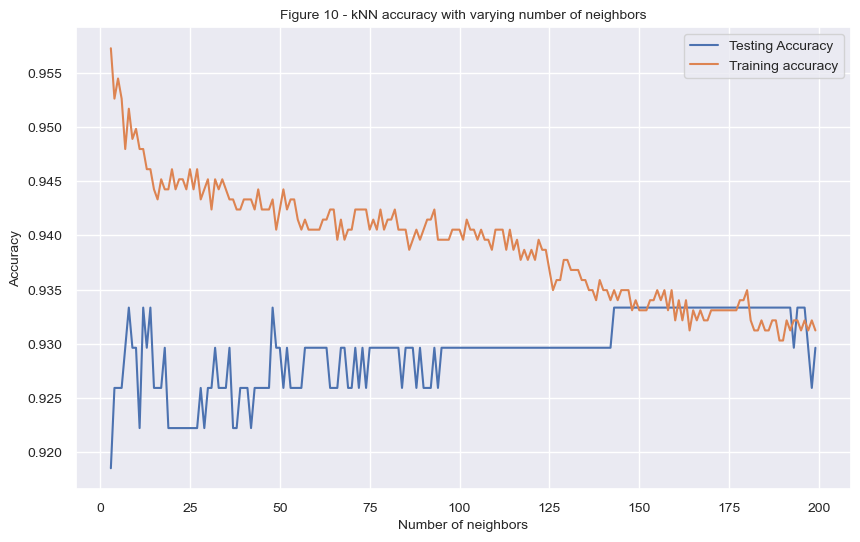

In [138]:
# creating figure, adding title
plt.figure(figsize = (10, 6))
plt.title('Figure 10 - kNN accuracy with varying number of neighbors', fontsize = 10)

# plotting the test accuracy and traning accuracy x number of neighbours
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')

# adding legend, axes labels, setting font size and axes ticks
plt.legend(prop={'size': 10})
plt.xlabel('Number of neighbors', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

## Conclusion<a id="Conclusion"></a>

In this study, the three models were compared using classification reports, confusion matrices and a table containing the corresponding data about cross validation. 

### Classification Report<a id="ClfReport"></a>

The performance of the three models was compared using classification reports. The kNN classifier had the highest accuracy among them (0.9333), followed by the LinearSVC model and the Neural Networks model. Furthermore, the kNN classifier had the highest precision and recall scores for both classes, indicating that it had the best performance in correctly predicting the classes.

On the other hand, ANN had the lowest precision and recall scores among the three models, showing that it had the worst performance in correctly predicting the classes. Additionally, LinearSVC had a good overall performance, with precision and recall scores that were slightly lower than the kNN classifier but higher than ANN. Therefore, while the performances of the three models were not significantly different, the kNN classifier clearly had the best performance overall.

In [487]:
# generating a classification report for LinearSVC
cr_linearsvc = metrics.classification_report(y_test, y_predicted_lin_clf, digits=4)

# flattening the predicted values for ANN and converting to binary values
y_pred_ann = ann_model.predict(X_test_pca)
y_pred_ann = y_pred_ann.flatten()
y_pred_ann_binary = np.where(y_pred_ann.round(2) > 0.5, 1, 0)

# generating a classification report for ANN
cr_ann = metrics.classification_report(y_test, y_pred_ann_binary, digits=4)

# generating a classification report for kNN
cr_knn = metrics.classification_report(y_test, y_predicted_knn, digits=4)


9/9 [==============================] - 0s 1ms/step


#### LinearSVC

In [465]:
# printing classification report for LinearSVC
print(cr_linearsvc)

              precision    recall  f1-score   support

           0     0.9254    0.9323    0.9288       133
           1     0.9338    0.9270    0.9304       137

    accuracy                         0.9296       270
   macro avg     0.9296    0.9297    0.9296       270
weighted avg     0.9297    0.9296    0.9296       270



#### Neural Networks

In [466]:
# printing classification report for Neural Networks
print(cr_ann)

              precision    recall  f1-score   support

           0     0.9185    0.9323    0.9254       133
           1     0.9333    0.9197    0.9265       137

    accuracy                         0.9259       270
   macro avg     0.9259    0.9260    0.9259       270
weighted avg     0.9260    0.9259    0.9259       270



#### k-Neighbours Classifier

In [467]:
# printing classification report for kNN classifier
print(cr_knn)

              precision    recall  f1-score   support

           0     0.9259    0.9398    0.9328       133
           1     0.9407    0.9270    0.9338       137

    accuracy                         0.9333       270
   macro avg     0.9333    0.9334    0.9333       270
weighted avg     0.9334    0.9333    0.9333       270



### Confusion Matrix<a id="ConfMatrix"></a>

When comparing the confusion matrices generated for the model, the LinearSVC model and the kNN model seem to have similar performance, with both correctly classifying a large number of normal and abnormal samples. The ANN model has slightly lower accuracy, misclassifying one more abnormal sample and one fewer normal sample compared to the other two models. However, all three models have a relatively low number of misclassified samples overall, suggesting that they are all performing well on this dataset.

In [486]:
# setting labels valid for all following confusion matrices
cm_labels = ['Normal (0)', 'Abnormal (1)']

#### LinearSVC

<AxesSubplot:>

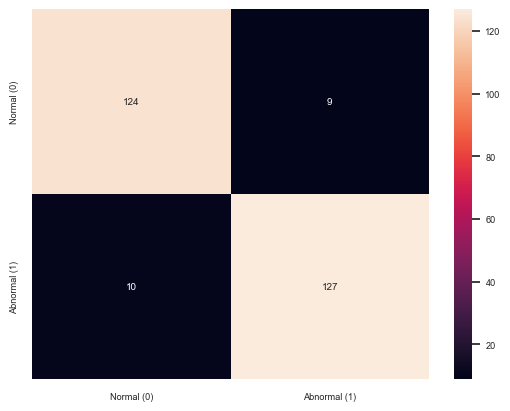

In [496]:
# generating confusion matrix using the test labels and the predicted labels from LinearSVC classifier
cm = confusion_matrix(y_test, y_predicted_lin_clf)

# converting the confusion matrix into a pandas dataframe
cm_dataframe = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)

# creating a heatmap using using seaborn
sns.heatmap(cm_dataframe, annot=True, fmt='d')

#### Neural Networks

<AxesSubplot:>

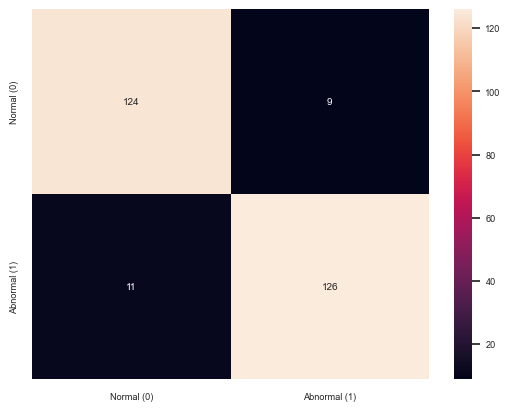

In [497]:
# generating confusion matrix using the test labels and the predicted labels from ANN model
cm = confusion_matrix(y_test, y_pred_ann_binary)

# converting the confusion matrix into a pandas dataframe
cm_dataframe = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)

# creating a heatmap using using seaborn
sns.heatmap(cm_dataframe, annot=True, fmt='d')

#### k-Neighbours Classifier

<AxesSubplot:>

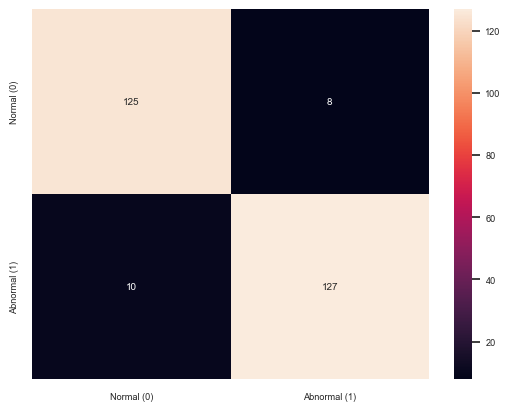

In [498]:
# generating confusion matrix using the test labels and the predicted labels from kNeighbour Classifier
cm = confusion_matrix(y_test, y_predicted_knn)

# converting the confusion matrix into a pandas dataframe
cm_dataframe = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)

# creating a heatmap using using seaborn
sns.heatmap(cm_dataframe, annot=True, fmt='d')

### Cross Validation<a id="CrossValidation"></a>
A 10-fold cross-validation was used to evaluate the performance of each model. From results below, it can be inferred that the LinearSVC model had the highest mean score (0.941), followed by the ANN model and then the kNN model. In terms of standard deviation, the ANN model had the highest value (0.03), indicating a greater variation in the scores compared to the LinearSVC and kNN models. However, it is important to note that the differences in mean scores between the three models are relatively small.

In [502]:
# generating a 10-fold cross-validation for LinearSVC
scores = cross_val_score(lin_clf, X_train_pca, y_train_rus, cv=10)

print(f"Mean score: {np.mean(scores):.3f}")
print(f"Standard deviation: {np.std(scores):.3f}")

Mean score: 0.947
Standard deviation: 0.014


In [500]:
# mean score for 10-fold of cross-validation for the best parameters for ANN.
score = grid_search_ann.cv_results_['mean_test_score'][grid_search_ann.best_index_]
stdev = grid_search_ann.cv_results_['std_test_score'][grid_search_ann.best_index_]

print(f"Mean score: {score:.3f}")
print(f"Standard deviation: {stdev:.3f}")

Mean score: 0.941
Standard deviation: 0.030


In [499]:
# generating a 10-fold cross validation for kNN
scores = cross_val_score(kNN, X_train_pca, y_train_rus, cv=10)
print(f"Mean score: {np.mean(scores):.3f}")
print(f"Standard deviation: {np.std(scores):.3f}")

Mean score: 0.932
Standard deviation: 0.023


#### Table - 10-Fold Cross-Validation Results by Model

<table>
  <tr>
    <th>Model</th>
    <th>Mean Score</th>
    <th>Standard Deviation</th>
  </tr>
  <tr>
    <td>LinearSVC</td>
    <td>0.947</td>
    <td>0.014</td>
  </tr>
  <tr>
    <td>Neural Networks</td>
    <td>0.941</td>
    <td>0.030</td>
  </tr>
  <tr>
    <td>k-Neighbours Classifier</td>
    <td>0.932</td>
    <td>0.023</td>
  </tr>
</table>

In conclusion, the performance of three models was compared using classification reports, confusion matrices, and 10-fold cross-validation. Based on these analyses, the kNN classifier was found to have the highest accuracy, precision, and recall scores, indicating the best performance in correctly predicting the classes. LinearSVC had a good overall performance, with precision and recall scores that were slightly lower than the kNN classifier but higher than ANN.

When comparing the confusion matrices, both the kNN and LinearSVC models had similar performance, with the ANN model having slightly lower accuracy. In terms of cross-validation, the LinearSVC model had the highest mean score, followed by the ANN model and then the kNN model. However, it is important to note that the differences in mean scores between the three models are relatively small, and further analysis would be necessary to determine whether these differences are statistically significant.